Data extraction and initial analysis of K-10 data from Microsoft, Tesla and Apple

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
appleDF = pd.read_csv(r"C:\Users\Ugo\Documents\Forage BCG\Apple_K10.csv")
microsoftDF = pd.read_csv(r'C:\Users\Ugo\Documents\Forage BCG\Microsoft_K10.csv')
teslaDF = pd.read_csv(r'C:\Users\Ugo\Documents\Forage BCG\Tesla_K10.csv')


In [3]:
appleDF.head()

,Unnamed: 0,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,2023,8200000000,96995000,352583000,"$145,308,000","$110,543,000"
1,2022,7500000000,99803000,352755000,"$153,982,000","$122,151,000"
2,2021,6700000000,94680000,351002000,"$125,481,000","$104,038,000"


In [10]:
appleDF.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
microsoftDF.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
teslaDF.rename(columns={"Unnamed: 0": "Year"}, inplace=True) # Renaming the 'unnamed' column to be 'Year'

In [16]:
appleDF['Total Revenue'] = pd.to_numeric(appleDF['Total Revenue'], errors='coerce')
appleDF['Net Income'] = pd.to_numeric(appleDF['Net Income'], errors='coerce')
appleDF['Total Assets'] = pd.to_numeric(appleDF['Total Assets'], errors='coerce')
appleDF['Total Liabilities'] = pd.to_numeric(appleDF['Total Liabilities'], errors='coerce')

microsoftDF['Total Revenue'] = pd.to_numeric(microsoftDF['Total Revenue'], errors='coerce')
microsoftDF['Net Income'] = pd.to_numeric(microsoftDF['Net Income'], errors='coerce')
microsoftDF['Total Assets'] = pd.to_numeric(microsoftDF['Total Assets'], errors='coerce')
microsoftDF['Total Liabilities'] = pd.to_numeric(microsoftDF['Total Liabilities'], errors='coerce')

teslaDF['Total Revenue'] = pd.to_numeric(teslaDF['Total Revenue'], errors='coerce')
teslaDF['Net Income'] = pd.to_numeric(teslaDF['Net Income'], errors='coerce')
teslaDF['Total Assets'] = pd.to_numeric(teslaDF['Total Assets'], errors='coerce')
teslaDF['Total Liabilities'] = pd.to_numeric(teslaDF['Total Liabilities'], errors='coerce')


# Calculate Revenue Growth (%)
appleDF['Revenue Growth (%)'] = appleDF['Total Revenue'].pct_change() * 100
microsoftDF['Revenue Growth (%)'] = microsoftDF['Total Revenue'].pct_change() * 100
teslaDF['Revenue Growth (%)'] = teslaDF['Total Revenue'].pct_change() * 100

# Calculate Net Income Growth (%)
appleDF['Net Income Growth (%)'] = appleDF['Net Income'].pct_change() * 100
microsoftDF['Net Income Growth (%)'] = microsoftDF['Net Income'].pct_change() * 100
teslaDF['Net Income Growth (%)'] = teslaDF['Net Income'].pct_change() * 100

# Calculate Net Asset Growth (%)
appleDF['Net Asset Growth (%)'] = appleDF['Total Assets'].pct_change() * 100
microsoftDF['Net Asset Growth (%)'] = microsoftDF['Total Assets'].pct_change() * 100
teslaDF['Net Asset Growth (%)'] = teslaDF['Total Assets'].pct_change() * 100

# Calculate Net Liability Growth (%)
appleDF['Net Liability Growth (%)'] = appleDF['Total Liabilities'].pct_change() * 100
microsoftDF['Net Liability Growth (%)'] = microsoftDF['Total Liabilities'].pct_change() * 100
teslaDF['Net Liability Growth (%)'] = teslaDF['Total Liabilities'].pct_change() * 100


microsoftDF.head()

C:\Users\Ugo\AppData\Local\Temp\ipykernel_12704\417952174.py:33: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  appleDF['Net Liability Growth (%)'] = appleDF['Total Liabilities'].pct_change() * 100


,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Net Asset Growth (%),Net Liability Growth (%)
0,2023,211000000000,88000000,330000000,150000000,125000000,NaN,NaN,NaN,NaN
1,2022,198000000000,85000000,320000000,140000000,120000000,-6.161137,-3.409091,-3.030303,-6.666667
2,2021,183000000000,82000000,310000000,130000000,115000000,-7.575758,-3.529412,-3.125000,-7.142857


Okay, I've added 'Revenue Growth (%)', 'Net Income Growth (%)', 'Net Asset Growth (%)', 'Net Liability Growth (%)' to measure the difference in growth over the years

In [17]:
# Add the 'Company' column to each DataFrame
appleDF['Company'] = 'Apple'
microsoftDF['Company'] = 'Microsoft'
teslaDF['Company'] = 'Tesla'
CompanyDF = pd.concat([appleDF, microsoftDF, teslaDF], ignore_index=True)
CompanyDF.fillna(0, inplace=True)
CompanyDF.head()

,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Net Asset Growth (%),Net Liability Growth (%),Company
0,2023,8200000000,96995000,352583000,0.0,"$110,543,000",0.000000,0.000000,0.000000,0.000000,Apple
1,2022,7500000000,99803000,352755000,0.0,"$122,151,000",-8.536585,2.894995,0.048783,0.000000,Apple
2,2021,6700000000,94680000,351002000,0.0,"$104,038,000",-10.666667,-5.133112,-0.496945,0.000000,Apple
3,2023,211000000000,88000000,330000000,150000000.0,125000000,0.000000,0.000000,0.000000,0.000000,Microsoft
4,2022,198000000000,85000000,320000000,140000000.0,120000000,-6.161137,-3.409091,-3.030303,-6.666667,Microsoft


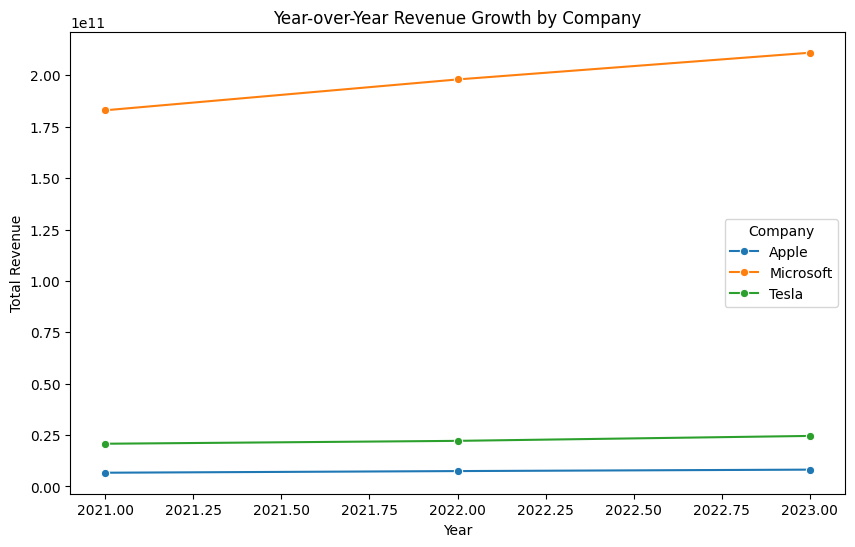

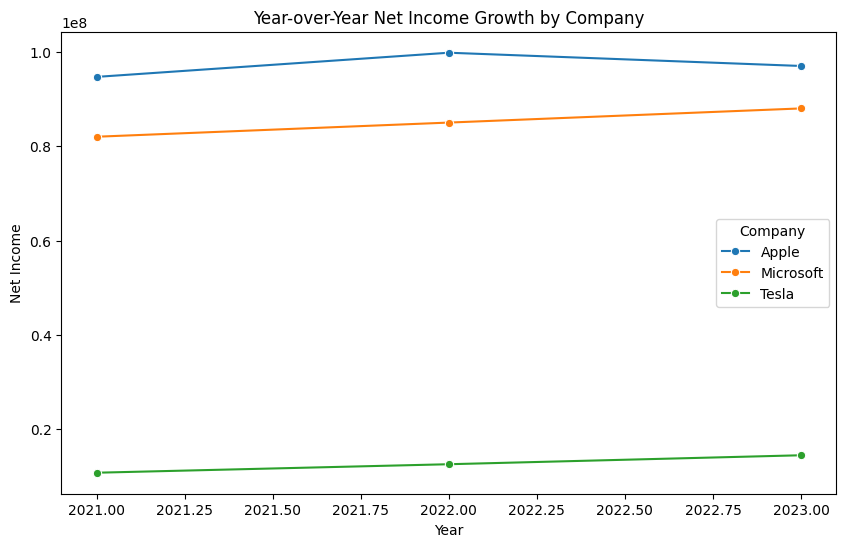

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=CompanyDF, x='Year', y='Total Revenue', hue='Company', marker='o')
plt.title('Year-over-Year Total Revenue by Company')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Company')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=CompanyDF, x='Year', y='Net Income', hue='Company', marker='o')
plt.title('Year-over-Year Total Income by Company')
plt.xlabel('Year')
plt.ylabel('Net Income')
plt.legend(title='Company')
plt.show()


Overtime, Microsoft is increasing their Year-over-Year Revenue between 2021 and 2023, whilst Apple and Tesla are staying mostly the same during the same time period. Whereas, within Year-over-Year Net Income Growth, all of the companies are increasing, but Tesla and Microsoft is increasing the least, and with Apple peaking during 2022, but decreasing again in 2023. Also Apple and Microsoft have a higher income compared to Tesla, but Microsoft had a higher revenue growth compared to Apple and Tesla.

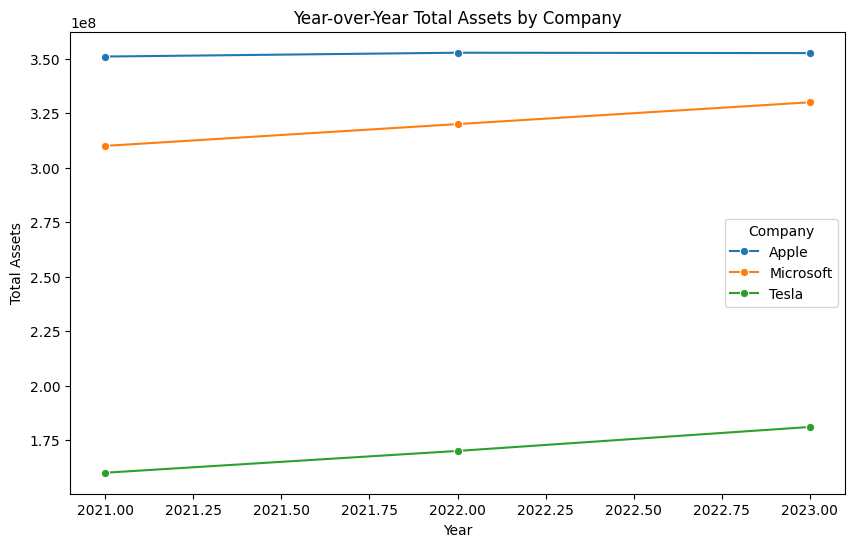

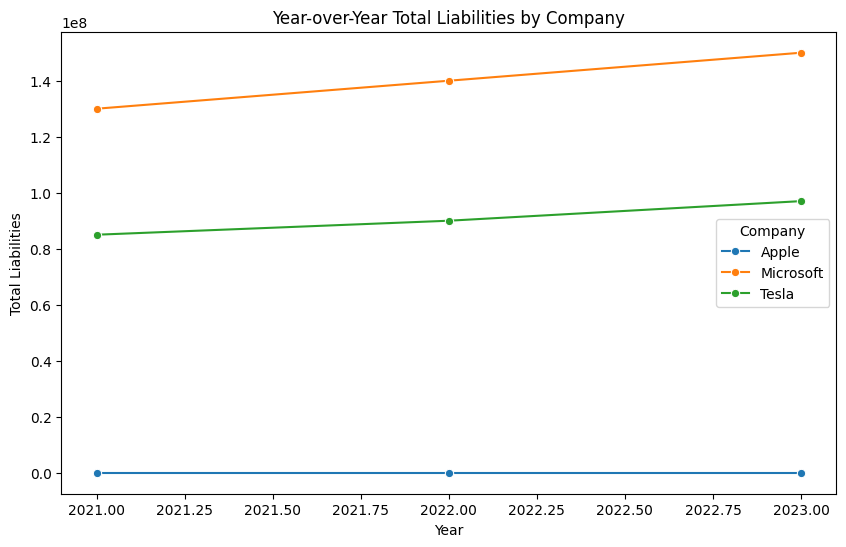

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=CompanyDF, x='Year', y='Total Assets', hue='Company', marker='o')
plt.title('Year-over-Year Total Assets by Company')
plt.xlabel('Year')
plt.ylabel('Total Assets')
plt.legend(title='Company')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=CompanyDF, x='Year', y='Total Liabilities', hue='Company', marker='o')
plt.title('Year-over-Year Total Liabilities by Company')
plt.xlabel('Year')
plt.ylabel('Total Liabilities')
plt.legend(title='Company')
plt.show()

Overtime, Tesla and Microsoft have an slight increase in their total assets between 2021 and 2023, whilst Apple remains the same during the same time period. Whereas, within Year-over-Year Total Liabilities, only Microsoft and Tesla are increasing in a significant way, but Apple is remaining the same at zero liabilities.

In [ ]:
def simple_chatbot(user_query):
    if user_query == "What is the total revenue for Apple in 2023?":
        print("The total revenue for Apple in 2023 is $8,200,000,000.")
    elif user_query == "What is the total revenue for Microsoft in 2023?":
        print("The total revenue for Microsoft in 2023 is $211,000,000,000.")
    elif user_query == "What is the total revenue for Tesla in 2023?":
        print("The total revenue for Tesla in 2023 is $24,600,000,000.")
    
    elif user_query == "How has net income for Apple changed between 2022 and 2023?":
        print("The net income has decreased by $2,808,000 from 2022 to 2023.")
    elif user_query == "How has total assets for Apple changed between 2022 and 2023?":
        print("The total assets have decreased by $172,000 from 2022 to 2023.")
    elif user_query == "How has total liabilities for Apple changed between 2022 and 2023?":
        print("The total liabilities have decreased by $8,674,000 from 2022 to 2023.")
    elif user_query == "How has total revenue for Apple changed between 2022 and 2023?":
        print("The total revenue has increased by $700,000,000 from 2022 to 2023.")
    
    elif user_query == "How has net income for Microsoft changed between 2022 and 2023?":
        print("The net income has increased by $3,000,000 from 2022 to 2023.")
    elif user_query == "How has total assets for Microsoft changed between 2022 and 2023?":
        print("The total assets have increased by $10,000,000 from 2022 to 2023.")
    elif user_query == "How has total liabilities for Microsoft changed between 2022 and 2023?":
        print("The total liabilities have increased by $10,000,000 from 2022 to 2023.")
    elif user_query == "How has total revenue for Microsoft changed between 2022 and 2023?":
        print("The total revenue has increased by $13,000,000,000 from 2022 to 2023.")
    
    elif user_query == "How has net income for Tesla changed between 2022 and 2023?":
        print("The net income has increased by $1,900,000 from 2022 to 2023.")
    elif user_query == "How has total assets for Tesla changed between 2022 and 2023?":
        print("The total assets have increased by $11,000,000 from 2022 to 2023.")
    elif user_query == "How has total liabilities for Tesla changed between 2022 and 2023?":
        print("The total liabilities have increased by $7,000,000 from 2022 to 2023.")
    elif user_query == "How has total revenue for Tesla changed between 2022 and 2023?":
        print("The total revenue has increased by $2,400,000,000 from 2022 to 2023.")
    
    else:
        print("Sorry, I can only provide information on predefined queries.")

# Example use
user_query = input("What is your question?")  
while user_query.lower() != "none":
    simple_chatbot(user_query)
    user_query = input("What is your question?")


user_query = input("What is your question?")  
while user_query != "none":
    simple_chatbot(user_query)
    user_query = input("What is your question?")

The total revenue for Apple in 2023 is $8,200,000,000.
The total revenue for Microsoft in 2023 is $211,000,000,000.
Sorry, I can only provide information on predefined queries.
Sorry, I can only provide information on predefined queries.


The chatbot is designed to respond to specific financial queries about Apple, Microsoft, and Tesla for the years 2021, 2022, and 2023. It takes a user’s question, identifies the relevant company, year, and financial metric (like total revenue or net income), and provides the corresponding data from predefined databases.
Predefined Queries

The chatbot can respond to the following types of questions:
- Total revenue for a specific year
- Net income changes between two years
- Total assets changes between two years
- Total liabilities changes between two years
- Cash flow from operating activities for a specific year

Limitations
- The chatbot can only handle queries related to the predefined companies (Apple, Microsoft, Tesla) and the specified years (2021, 2022, 2023).
- It requires the user's query to include both the company and the year for accurate responses.
- It cannot provide information beyond the predefined financial metrics.
- The responses are limited to the data available in the existing databases.